In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

In [3]:
df.head(15)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
5,ORD000006,CUST3286,Blinkit,36:29.5,25,Personal Care,1939,Items missing from order.,2,No,Yes
6,ORD000007,CUST2679,JioMart,22:29.5,22,Personal Care,1693,"Fast delivery, great service!",5,No,No
7,ORD000008,CUST9935,Swiggy Instamart,50:29.5,16,Personal Care,195,"Horrible experience, never ordering again.",1,No,Yes
8,ORD000009,CUST2424,JioMart,51:29.5,39,Fruits & Vegetables,182,Very satisfied with the service.,5,No,No
9,ORD000010,CUST7912,JioMart,08:29.5,51,Grocery,1279,"Very late delivery, not happy.",2,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [5]:
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe().round(2)

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.00,100000.00,100000.00
mean,29.54,590.99,3.24
std,9.96,417.41,1.58
min,5.00,50.00,1.00
25%,23.00,283.00,2.00
50%,30.00,481.00,3.00
75%,36.00,770.00,5.00
max,76.00,2000.00,5.00


### The average delivery time is 29.54 minutes.

### The average service rating by customers is 3.24 out of 5.00.

### The average amount ordered by customers is Rs. 590.99.

<function matplotlib.pyplot.show(close=None, block=None)>

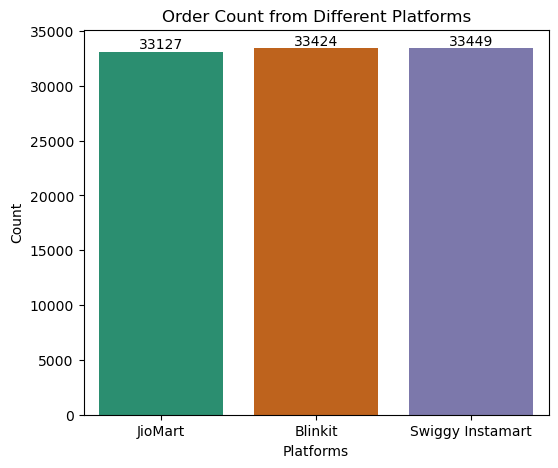

In [8]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = "Platform", data = df, hue = "Platform", palette="Dark2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xlabel("Platforms")
plt.ylabel("Count")
plt.title("Order Count from Different Platforms")
plt.show

### From the above chart we can say that even though three of these platforms are widely used by customers, still they prefer Swiggy Instamart slightly over JioMart and Blinkit.

In [9]:
top_5_customers = (df['Customer ID'].value_counts().reset_index().head(5))
top_5_customers.columns = ['Customer ID', 'No. of Times Ordered']
print(top_5_customers)

  Customer ID  No. of Times Ordered
0    CUST8779                    26
1    CUST1848                    25
2    CUST8289                    24
3    CUST5902                    23
4    CUST3001                    23


### These are the top 5 customers who have made order maximum times.

<function matplotlib.pyplot.show(close=None, block=None)>

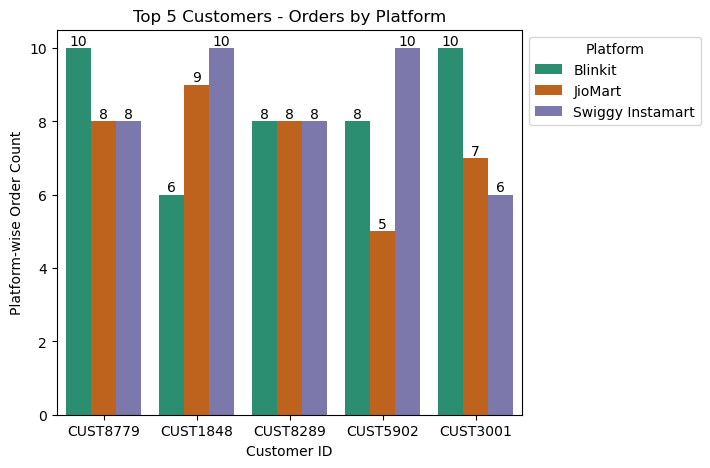

In [10]:
plt.figure(figsize=(6,5))
top_customer = top_5_customers['Customer ID'].tolist()
filtered_list = df[df['Customer ID'].isin(top_customer)]
ax = sns.countplot(x = 'Customer ID', data = filtered_list, hue = 'Platform', palette='Dark2', order=top_customer)
plt.title("Top 5 Customers - Orders by Platform")
plt.xlabel("Customer ID")
plt.ylabel("Platform-wise Order Count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.legend(title='Platform', bbox_to_anchor = (1,1))
plt.show

### From the above chart we can say that the top 5 customers prefer Blinkit and Swiggy Instamart over JioMart.

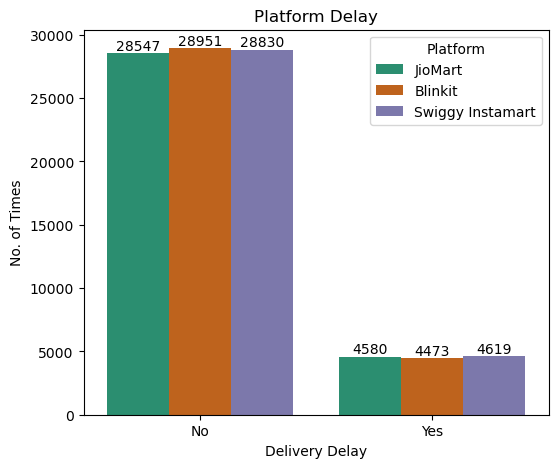

In [11]:
plt.figure(figsize=(6,5))
delay =  sns.countplot(x= "Delivery Delay", data=df, palette="Dark2", hue="Platform")
plt.xlabel("Delivery Delay")
plt.ylabel("No. of Times")
delay.bar_label(delay.containers[0])
delay.bar_label(delay.containers[1])
delay.bar_label(delay.containers[2])
plt.title("Platform Delay")
plt.show()

### Blinkit records the fewest delayed deliveries and the highest number of on-time deliveries, indicating it’s the most reliable platform among the three. Instamart and JioMart follow closely, with JioMart showing the lowest overall order volume.

In [12]:
avg_rating = df.groupby('Platform')['Service Rating'].mean().reset_index()
print("Average Rating:\n", avg_rating)

Average Rating:
            Platform  Service Rating
0           Blinkit        3.233844
1           JioMart        3.245147
2  Swiggy Instamart        3.243415


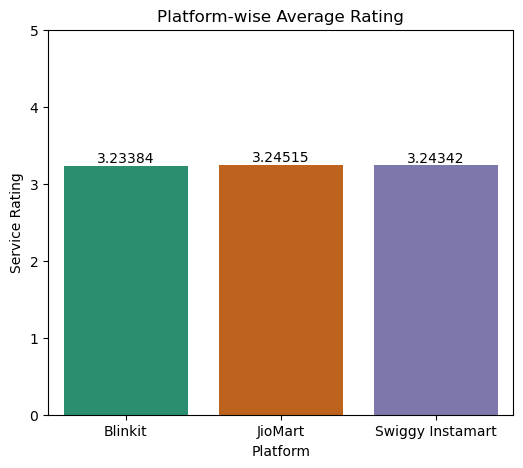

In [13]:
plt.figure(figsize=(6,5))
rating = sns.barplot(x = "Platform", y = "Service Rating", data=avg_rating, palette="Dark2", hue="Platform")
rating.bar_label(rating.containers[0])
rating.bar_label(rating.containers[1])
rating.bar_label(rating.containers[2])
plt.title("Platform-wise Average Rating")
plt.ylim(0, 5)
plt.show()

### The average ratings across platforms are almost identical, with JioMart holding a slight edge, followed closely by Swiggy Instamart and Blinkit, indicating fairly consistent service quality among all three.

In [14]:
# JioMart
top5_jiomart = (
    df[df['Platform'] == 'JioMart']
    .groupby('Customer ID')['Order Value (INR)']
    .sum()
    .nlargest(5)
    .reset_index()
)
print("Top 5 JioMart Customers:\n", top5_jiomart)

Top 5 JioMart Customers:
   Customer ID  Order Value (INR)
0    CUST8193               8273
1    CUST1129               8243
2    CUST1058               7843
3    CUST7038               7709
4    CUST6515               7645


In [15]:
# Blinkit
top5_blinkit = (
    df[df['Platform'] == 'Blinkit']
    .groupby('Customer ID')['Order Value (INR)']
    .sum()
    .nlargest(5)
    .reset_index()
)
print("Top 5 Blinkit Customers:\n", top5_blinkit)

Top 5 Blinkit Customers:
   Customer ID  Order Value (INR)
0    CUST3222               8773
1    CUST2207               8721
2    CUST5896               8682
3    CUST9615               8556
4    CUST8877               8494


In [16]:
# Instamart
top5_instamart = (
    df[df['Platform'] == 'Swiggy Instamart']
    .groupby('Customer ID')['Order Value (INR)']
    .sum()
    .nlargest(5)
    .reset_index()
)
print("Top 5 Instamart Customers:\n", top5_instamart)

Top 5 Instamart Customers:
   Customer ID  Order Value (INR)
0    CUST9682               9979
1    CUST6549               8923
2    CUST4083               8866
3    CUST5757               8704
4    CUST1110               8427


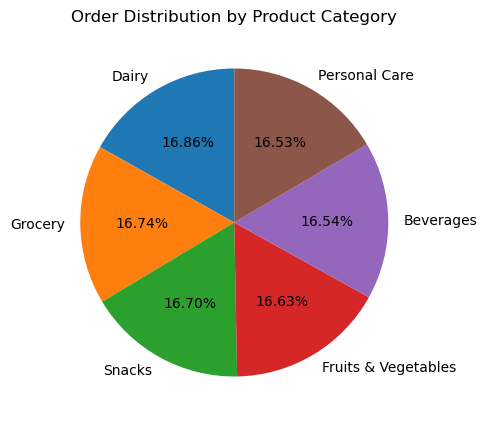

In [35]:
plt.figure(figsize=(5, 5))
category_orders = df['Product Category'].value_counts()
plt.pie(category_orders, labels=category_orders.index, autopct='%1.2f%%', startangle=90)
plt.title("Order Distribution by Product Category")
plt.show()

### Dairy Order holds the maximum percentage followed by Grocery and Snacks order by the customers.

In [18]:
Top_3_ProductCategory = (df.groupby("Product Category")['Order Value (INR)'].sum().nlargest(3).reset_index())
print(Top_3_ProductCategory)

  Product Category  Order Value (INR)
0    Personal Care           17395601
1          Grocery           14194055
2        Beverages            9086669


In [19]:
category_platform = (df.groupby(['Product Category', 'Platform'])['Order Value (INR)'].sum().reset_index())

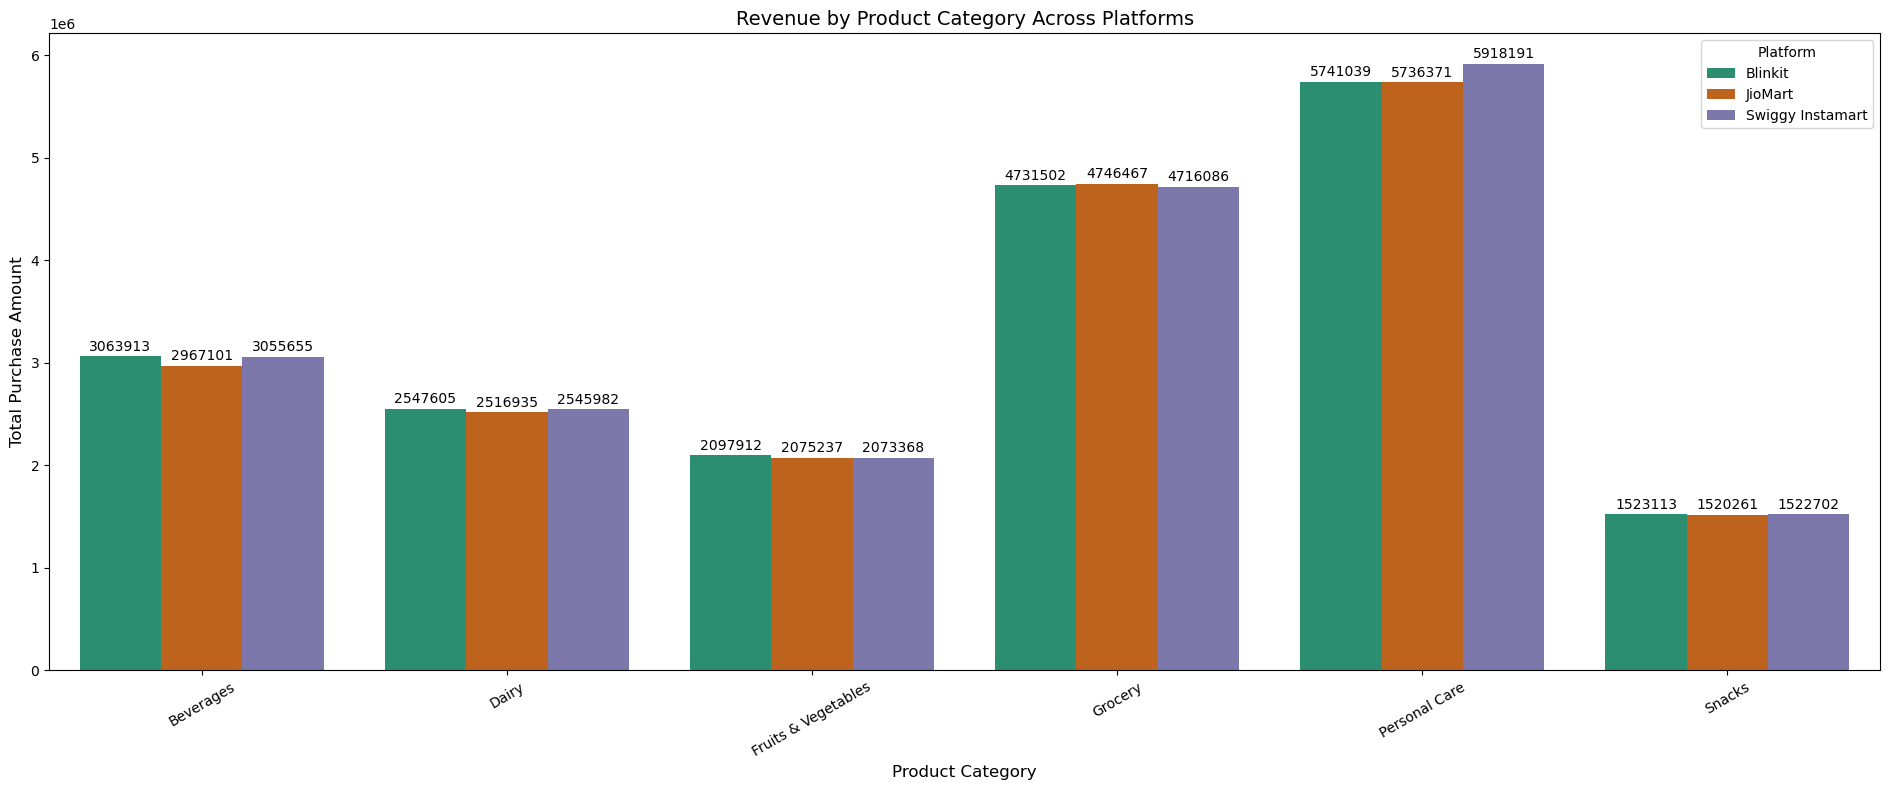

In [20]:
plt.figure(figsize=(19,8))
ax = sns.barplot(data=category_platform, x='Product Category', y='Order Value (INR)', hue='Platform', palette='Dark2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
    
plt.title('Revenue by Product Category Across Platforms', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


### Across all three platforms, Personal Care generated the highest revenue, followed by Grocery, while Snacks brought in the least. Revenue distribution across Blinkit, JioMart, and Swiggy Instamart remains nearly identical within each category.

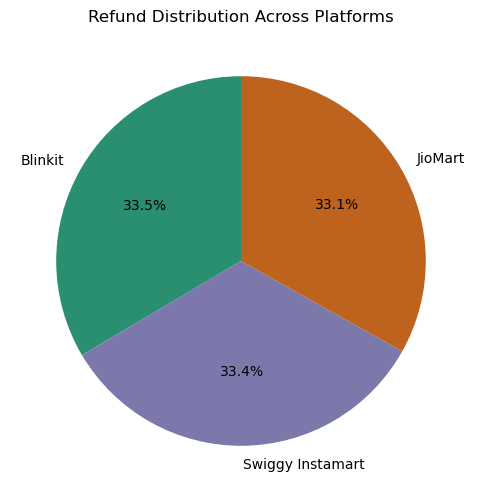

In [21]:
refund_df = df[df['Refund Requested'] == 'Yes']

refund_counts = refund_df['Platform'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(refund_counts, labels=refund_counts.index, autopct='%.1f%%', startangle=90, colors=['#2a8f70','#7c78ab','#bd631d'])
plt.title('Refund Distribution Across Platforms')
plt.show()

### Refund requests are almost evenly distributed across platforms, with Blinkit having a slightly higher share compared to Swiggy Instamart and JioMart, indicating consistent refund behavior among users.
